In [20]:
#install seaborn
%pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import urllib.request
import ssl
import certifi

# Use certifi's CA bundle
ctx = ssl.create_default_context(cafile=certifi.where())
response = urllib.request.urlopen("https://httpbin.org/get", context=ctx)
print(response.read().decode()[:200])

{
  "args": {}, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.14", 
    "X-Amzn-Trace-Id": "Root=1-690ae150-15b0353a4241915830d5eb4


In [3]:
urllib.request.urlopen("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/iris.csv")

In [21]:
#load dataset 
tips = sns.load_dataset('tips')
print(tips.head())

# load csv 
# tips = pd.read_csv('tips.csv')
# print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


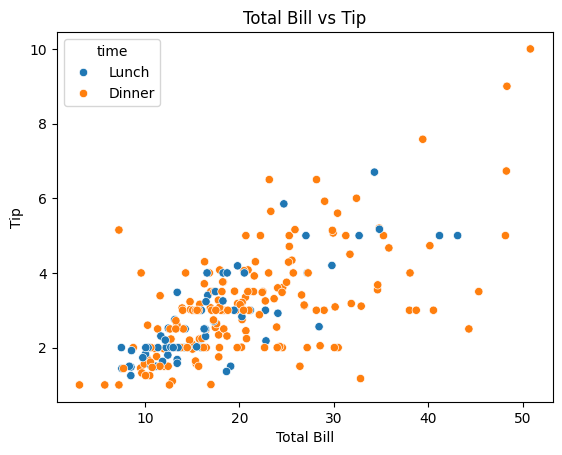

In [7]:
# scatter plot
# sns.scatterplot(x=tips['total_bill'], y=tips['tip'])
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
# set title
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


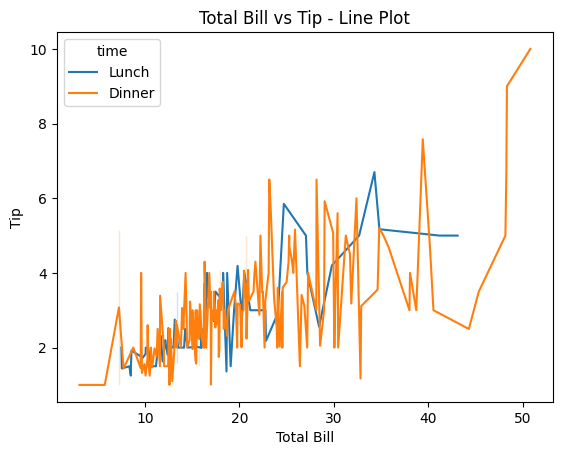

In [8]:
# print column names
print(tips.columns)
# line plot
sns.lineplot(data=tips, x='total_bill', y='tip', hue='time')
# set title
plt.title('Total Bill vs Tip - Line Plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [22]:
# load new dataset fmri
fmri = sns.load_dataset('fmri')
print(fmri.head())

# load fmri csv
# fmri = pd.read_csv('fmri.csv')
# print(fmri.head())

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


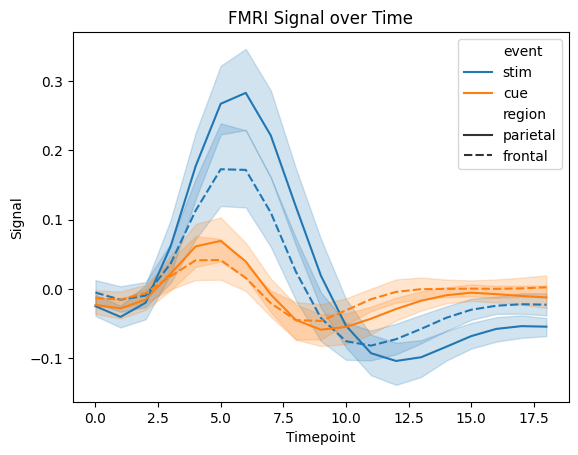

In [10]:
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event', style='region')
plt.title('FMRI Signal over Time')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


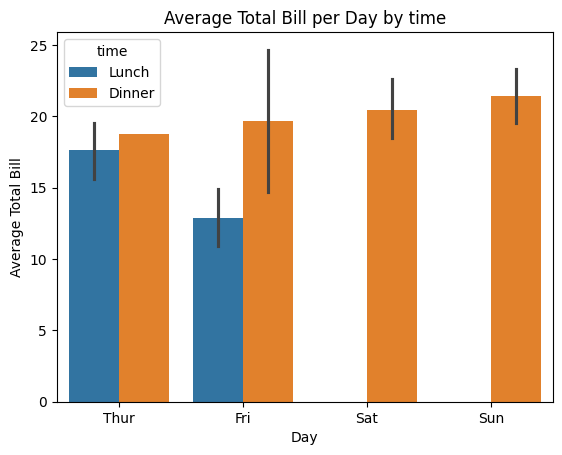

In [11]:
# barplot - categorial data plotting
print(tips.head())

sns.barplot(data=tips,x='day',y='total_bill',hue='time')
plt.title('Average Total Bill per Day by time')
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.savefig('barplot.png')
plt.show()

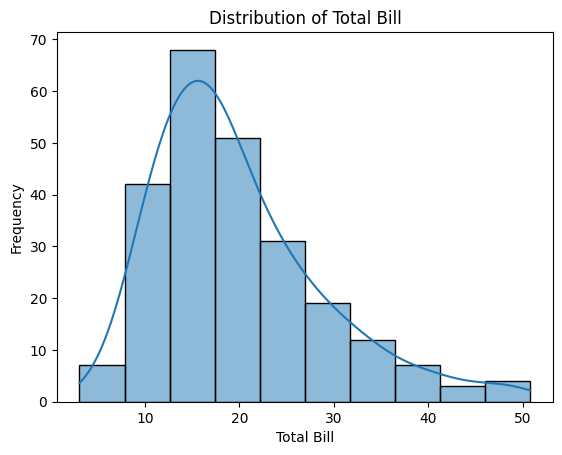

In [12]:
# histogram of total_bill -> distribution of total_bill

sns.histplot(data=tips, x='total_bill', bins=10, kde=True) # kde -> kernel density estimation ( add a density curve )
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

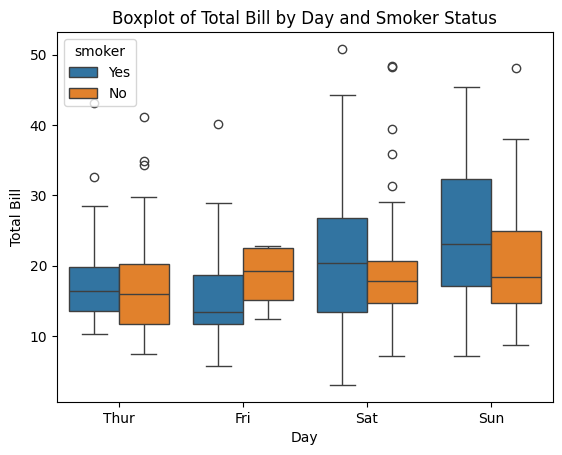

In [13]:
# boxplot - summarize data distribution with respect to categories
# highlight outliers
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker')
plt.title('Boxplot of Total Bill by Day and Smoker Status')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

In [14]:
# load iris dataset
# iris = sns.load_dataset('iris')
# print(iris.head())

# load iris csv
iris = pd.read_csv('iris.csv')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


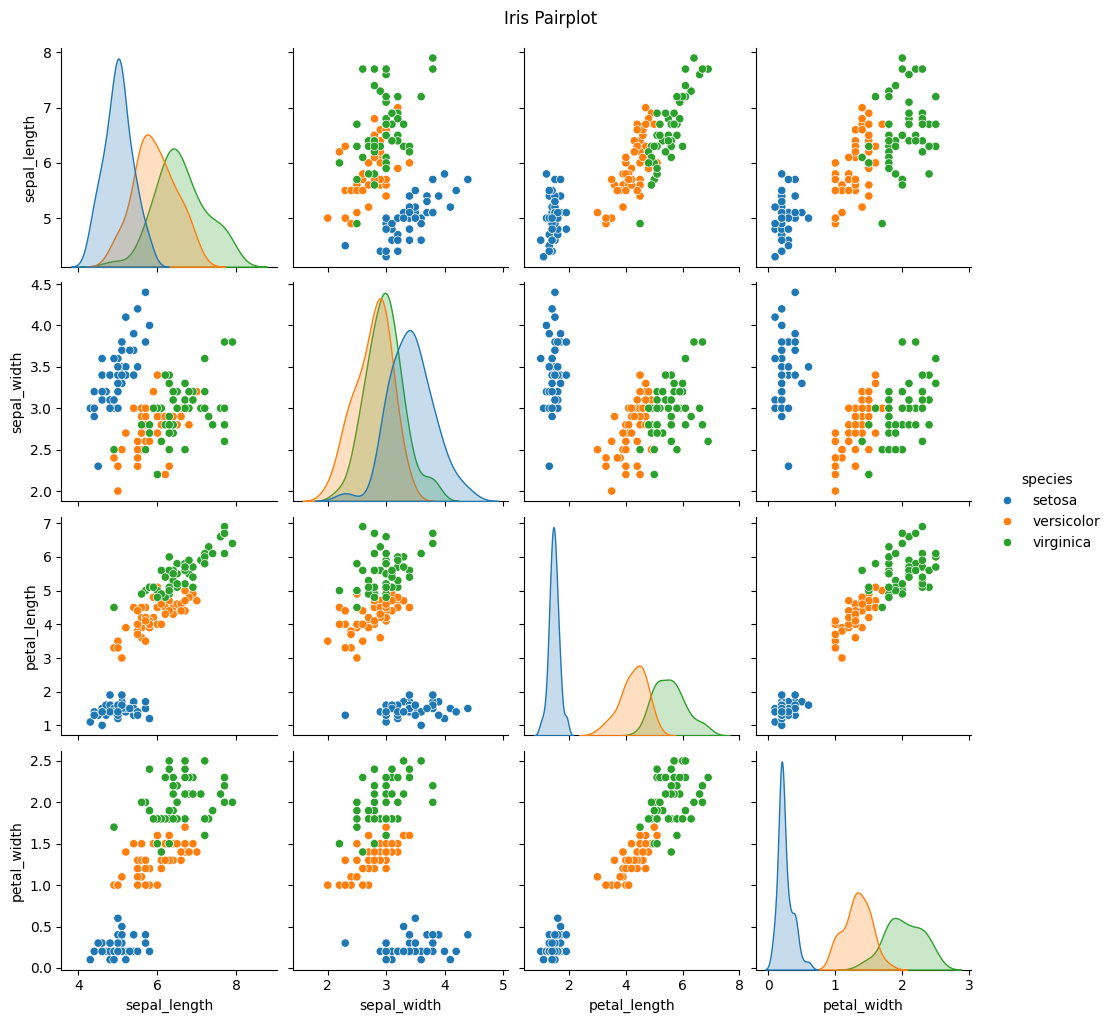

In [15]:
sns.pairplot(iris, hue='species')
plt.suptitle('Iris Pairplot', y=1.02)
plt.show()

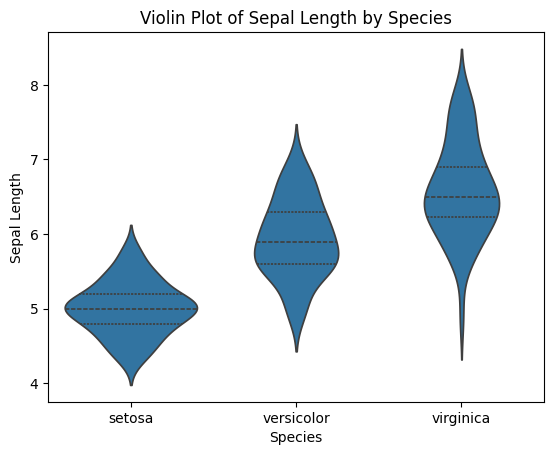

In [16]:
# violin plot - distribution of sepal_length across different species
violinplot = sns.violinplot(data=iris, x='species', y='sepal_length', inner='quartile')
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

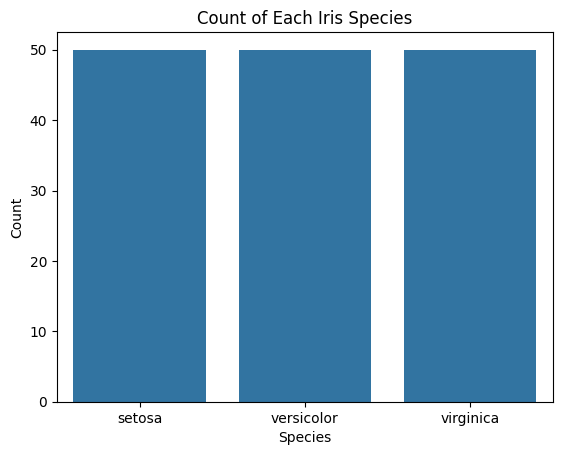

In [17]:
# coutplot - count of each species
countplot = sns.countplot(data=iris, x='species')
plt.title('Count of Each Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

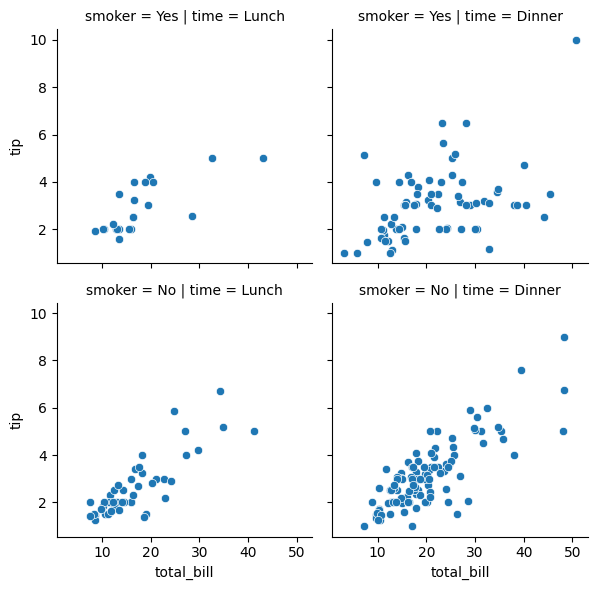

In [18]:
# facet grid - multiple plots based on categories
g = sns.FacetGrid(tips, col='time', row='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

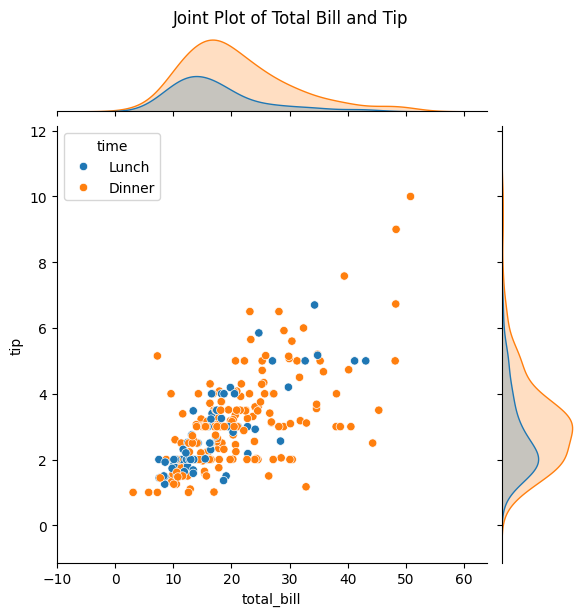

In [19]:
# joint plot - combination of scatter plot and histogram
sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter', hue='time')
plt.suptitle('Joint Plot of Total Bill and Tip', y=1.02)
plt.show()